In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [118]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

# print(file_list)  

df = pd.DataFrame()

for index, csv in enumerate(file_list):
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    if int(csv[-5]) == 0:
        file_list[index] = csv[:-5] + '1' +csv[-4:]
        print('changed csv: ', csv)
    target_column = pd.DataFrame(np.array([int(file_list[index][-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
print(file_list)

changed csv:  data_20190303_1035_0.csv
['data_20190301_1035_2.csv', 'data_20190303_1035_1.csv', 'data_20190309_1008_3.csv', 'data_20190309_1334_3.csv', 'data_20190309_1336_3.csv', 'data_20190309_1342_2.csv', 'data_20190309_1358_2.csv', 'data_20190309_1405_2.csv', 'data_20190309_1409_1.csv', 'data_20190309_1411_1.csv', 'data_20190309_1413_1.csv']


In [119]:
df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,22.62949,23.34601,22.84607,24.27225,24.22751,24.99457,27.39221,26.94012,27.34689,27.80975,...,25.27432,22.86929,22.75967,22.38684,22.88013,22.94119,22.99555,22.63037,23.33066,2
1,23.16067,23.59763,25.04761,24.74619,27.40509,27.20163,28.14008,27.87192,28.14847,27.80102,...,23.29489,22.53711,22.20065,22.37799,22.64114,21.91843,22.99634,23.05240,22.60111,2
2,23.03558,24.24997,23.59360,24.87021,25.99951,27.53504,27.61453,28.60287,27.45639,27.70782,...,22.45697,21.56348,22.20950,22.61514,22.40997,22.42819,22.61395,23.05298,23.48731,2
3,22.25803,23.60641,22.50025,24.63440,23.02280,26.32965,24.39380,27.77655,26.36633,27.61267,...,23.10901,21.89667,22.56369,22.38712,22.90918,22.18204,22.10751,22.77466,23.50760,2
4,22.11905,23.36346,22.37064,22.95017,22.00073,22.74686,22.73328,22.88919,22.98193,23.40122,...,23.62778,22.02560,21.54199,22.05508,22.78049,21.82272,22.62360,22.51157,23.20691,2
5,22.24774,22.82923,22.61456,22.57074,23.90958,23.42151,29.41101,25.57358,31.09058,27.32391,...,27.53855,22.44513,26.72360,23.09903,27.47080,23.32593,26.35037,23.63992,25.92902,2
6,22.52435,23.08780,22.99613,23.42499,27.74887,27.32492,32.70804,31.86749,32.91443,31.11096,...,27.65057,26.46704,26.62717,28.45911,28.85034,27.50784,26.86649,26.02933,26.92896,2
7,22.37411,22.70657,23.83859,25.60977,30.59570,31.41663,33.40170,34.25433,34.12695,33.94504,...,26.92328,26.37424,27.03885,27.01385,26.07596,25.69312,26.34161,25.90204,25.91846,2
8,21.86481,23.21832,25.19602,27.96146,31.86359,33.18375,32.81717,33.36041,33.39514,34.12235,...,26.64026,25.84201,26.19956,26.21033,26.44818,25.68188,25.34921,25.75110,26.08591,2
9,22.52863,23.10373,25.43658,28.09415,31.44864,32.99234,32.91727,33.77081,33.67676,33.58032,...,27.35138,25.64829,26.19898,26.56589,26.56338,26.18738,25.98495,26.04471,26.22647,2


In [120]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点
df_ave_ta = pd.DataFrame()

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    ave_ta = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
                face.append(j)
#                 onlyface.append(j)
            else:
                face.append(minTa)
                ave_ta.append(j)
        except:
            j = float(j[:6])
            if j - minTa > 7:
                face.append(j)
#                 onlyface.append(j)
            else:
                face.append(minTa)
                ave_ta.append(j)
    face_todf = pd.DataFrame(face).T
    ave_ta_todf = pd.DataFrame(ave_ta).T
#     onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_ave_ta = pd.concat([df_ave_ta, ave_ta_todf], axis=0, ignore_index=True)
#     df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [121]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_face)
# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [122]:
min_index = np.argpartition(X_scores, int(df_face.shape[0]*0.05))[:int(df_face.shape[0]*0.05)]

# 去除掉5%的异常样本
df = df.drop(min_index)

In [123]:
ta = ta.iloc[df.index]

In [124]:
target_column = target_column.iloc[df.index]

In [125]:
target_column.index = np.arange(target_column.shape[0])
# 因为df_Onlyface是0到725，target_column虽然也是726行，但是pd.concat在连的时候，ignore_index是指忽略axis=1这个轴上的index，不是Axis=0
# 但是又不能指定outter，因为df_onlyface的index是无意义的

In [126]:
for i, minTa in zip(df.values, ta):
#     face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
#                 face.append(j)
                onlyface.append(j)
#             else:
#                 face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 7:
#                 face.append(j)
                onlyface.append(j)
#             else:
#                 face.append(minTa)
#     face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
#     df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [127]:
df_onlyface_temp = pd.concat([target_column, df_onlyface], axis=1, ignore_index=True)

In [140]:
df_ave_ta = df_ave_ta.iloc[df.index]

In [144]:
df_ave_ta.index = np.arange(df_ave_ta.shape[0])

In [149]:
skewness = pd.DataFrame(df_onlyface.skew(axis=1))
maxTemp = pd.DataFrame(df_onlyface.max(axis=1))
minTemp = pd.DataFrame(df_onlyface.min(axis=1))
meanTemp = pd.DataFrame(df_onlyface.mean(axis=1))
ave_ta = df_ave_ta.mean(axis=1)

In [130]:
# 指定划分bin的点
bins = [28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]

highest_bin_list = []
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(np.clip(i,28.3,36.7), bins=bins)
    highest_bin = (bins[N.argmax()]+bins[N.argmax()+1])/2
    # 返回各区域频数N
    highest_bin_list.append(highest_bin)

modeTemp = pd.DataFrame(highest_bin_list, index=df_onlyface.index)

In [150]:
features = pd.concat([skewness, maxTemp, minTemp, meanTemp, modeTemp, ta], axis=1) 
# 默认是outer所以每一列都要改成0-725，之前的ta的index需要重置一下
features.columns = ['skewness', 'maxTemp', 'minTemp', 'meanTemp', 'modeTemp', 'ta']

In [152]:
features['max_minus_min'] = features['maxTemp'] - features['minTemp']
features['mode_minus_ta'] = features['modeTemp'] - features['ta']
# features['mean_minus_ta'] = features['meanTemp'] - features['ta']
# features['max_minus_ta'] = features['maxTemp'] - features['ta']
features['min_minus_ta'] = features['minTemp'] - features['ta']
# features['mode_minus_min'] = features['modeTemp'] - features['minTemp']
# features['mean_minus_min'] = features['meanTemp'] - features['minTemp']
# features['max_minus_mean'] = features['maxTemp'] - features['meanTemp']
# features['mode_squa'] = features['modeTemp'] ** 2
# features['mean_squa'] = features['meanTemp'] ** 2
# features['max_squa'] = features['maxTemp'] ** 2
# features['mode_cub'] = features['modeTemp'] ** 3
# features['mean_cub'] = features['meanTemp'] ** 3
# features['max_cub'] = features['maxTemp'] ** 3
features = features.drop(["minTemp"], axis=1)
features['target'] = target_column

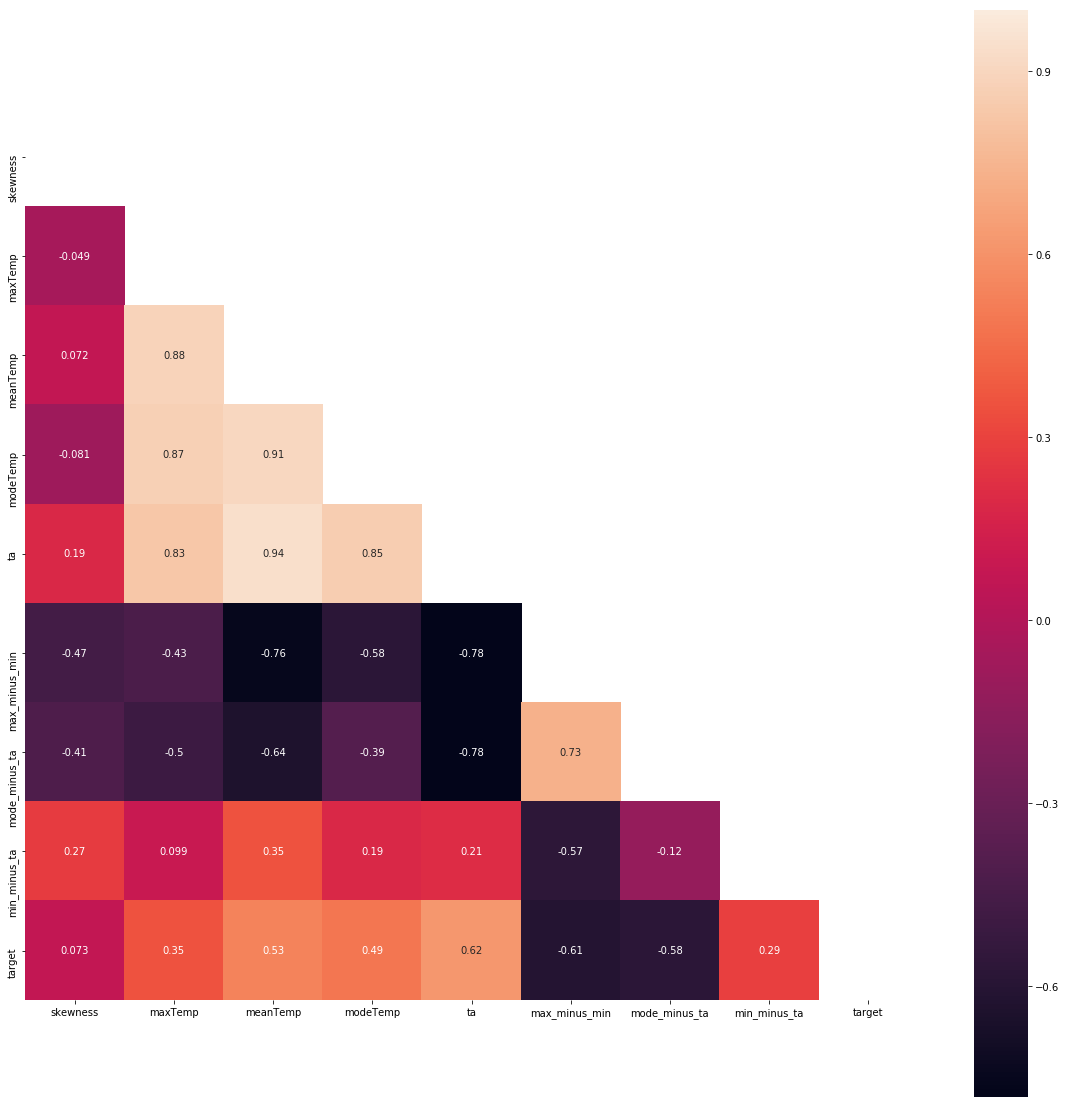

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

featuresCorr = features.corr('spearman')
fig = plt.figure(figsize=(20, 20))
# plt.subplots((1,1,1)) # 设置画面大小
mask = np.zeros_like(featuresCorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(featuresCorr, annot=True, vmax=1, square=True, mask=mask)
plt.savefig('I:\graduation\论文\images\corr', dpi=200)
plt.show()

In [154]:
features = features.drop('target', axis=1)

In [155]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features_scaler = std.fit_transform(features)

In [156]:
from sklearn.model_selection import train_test_split

train = features_scaler
target = target_column.values

train_X,test_X, train_y, test_y = train_test_split(train,
                                                   target,
                                                   test_size = 0.1,
                                                   random_state = 0)

# 使用SelectFromModel结合LassoCV来选择特征

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(train_X, train_y)
X_transform = sfm.transform(train_X)
n_features = sfm.transform(train_X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 5:
    sfm.threshold += 0.1
    X_transform = sfm.transform(train_X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
# plt.title(
#     "Features selected from Boston using SelectFromModel with "
#     "threshold %0.3f." % sfm.threshold)
# feature1 = X_transform[:, 0]
# feature2 = X_transform[:, 1] 
# plt.plot(feature1, feature2, 'r.')
# plt.xlabel("Feature number 1")
# plt.ylabel("Feature number 2")
# plt.ylim([np.min(feature2), np.max(feature2)])
# plt.show()

剩下meanTemp, modeTemp, min_minus_ta, max_minus_mean四个特征

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
param_grid = {
    'max_depth':np.arange(1,30, 1),
    'max_features':np.arange(1, 4, 1),
    'max_leaf_nodes':np.arange(2, 30, 1),
    'min_samples_leaf':np.arange(1, 20, 1),
}
search = GridSearchCV(tree_clf, param_grid, iid=False, cv=5)
search.fit(X_transform, train_y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.778):
{'max_depth': 17, 'max_features': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 4}


In [67]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=17, max_features=3, max_leaf_nodes=6, min_samples_leaf=4)
tree_clf.fit(X_transform, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=3, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [73]:
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "."
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

dot_data = export_graphviz(
        tree_clf,
        out_file=image_path("best_param_tree.dot"),
        feature_names=['meanTemp', 'modeTemp', 'min_minus_ta', 'max_minus_mean'],
        class_names=list(str(i) for i in set(target_column.values)),
        rounded=True,
        filled=True
    )

In [83]:
test_X_com = np.concatenate([test_X[:, 2:4], test_X[:, -2:]], axis=1)

In [86]:
pred_X = tree_clf.predict(test_X_com)
acc_decision_tree = round(tree_clf.score(test_X_com, test_y) * 100, 2)
acc_decision_tree

79.45

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, test_X, test_y)

array([0.57692308, 0.79166667, 0.73913043])

感觉结果不太行

# 使用递归消除来选择特征

Optimal number of features : 10


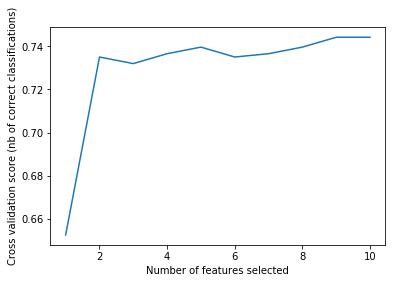

In [95]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold

# gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(train_y, 2),
              scoring='accuracy')
rfecv.fit(train_X, train_y)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
param_grid = {
    'max_depth':np.arange(1,30, 1),
    'max_features':np.arange(1, 4, 1),
    'max_leaf_nodes':np.arange(2, 30, 1),
    'min_samples_leaf':np.arange(1, 20, 1),
}
search = GridSearchCV(tree_clf, param_grid, iid=False, cv=4)
search.fit(train_X, train_y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.861):
{'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': 24, 'min_samples_leaf': 2}


In [98]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7, max_features=3, max_leaf_nodes=24, min_samples_leaf=2)
tree_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=3, max_leaf_nodes=24, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [104]:
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "."
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

dot_data = export_graphviz(
        tree_clf,
        out_file=image_path("best_param_tree_rfecv.dot"),
#         feature_names=['meanTemp', 'modeTemp', 'min_minus_ta', 'max_minus_mean'],
        feature_names=features.columns,
        class_names=list(str(i) for i in set(target_column.values)),
        rounded=True,
        filled=True
    )

In [105]:
pred_X = tree_clf.predict(test_X)
acc_decision_tree = round(tree_clf.score(test_X, test_y) * 100, 2)
acc_decision_tree

89.04

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, test_X, test_y)

array([0.73076923, 0.75      , 0.82608696])

# 先使用决策树来挑选特征

In [158]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(train_X, train_y)
print(clf.feature_importances_ )

model = SelectFromModel(clf, prefit=True)
print(features.columns[model.get_support(indices=True)])
# print(model.get_support(indices=True))
X_new = model.transform(train_X)

[0.0935665  0.06204955 0.18477011 0.06577898 0.17564944 0.14029955
 0.1620063  0.11587956]
Index(['meanTemp', 'ta', 'max_minus_min', 'mode_minus_ta'], dtype='object')


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()
param_grid = {
    'max_depth':np.arange(1,30, 1),
    'max_features':np.arange(1, 4, 1),
    'max_leaf_nodes':np.arange(2, 30, 1),
    'min_samples_leaf':np.arange(1, 20, 1),
}
search = GridSearchCV(tree_clf, param_grid, iid=False, cv=4, n_jobs=-1)
search.fit(X_new, train_y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.881):
{'max_depth': 19, 'max_features': 3, 'max_leaf_nodes': 29, 'min_samples_leaf': 1}


In [37]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=19, max_features=3, max_leaf_nodes=29, min_samples_leaf=1)
tree_clf.fit(X_new, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=3, max_leaf_nodes=29, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "."
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

dot_data = export_graphviz(
        tree_clf,
        out_file=image_path("best_param_tree_sfm.dot"),
#         feature_names=['meanTemp', 'modeTemp', 'min_minus_ta', 'max_minus_mean'],
        feature_names=features.columns[model.get_support(indices=True)],
        class_names=list(str(i) for i in set(target_column.values)),
        rounded=True,
        filled=True
    )

In [52]:
test_X_com = np.concatenate((test_X[:, 0].reshape(-1,1), test_X[:, 2].reshape(-1,1), test_X[:, 4:6]), axis=1)

In [53]:
pred_X = tree_clf.predict(test_X_com)
acc_decision_tree = round(tree_clf.score(test_X_com, test_y) * 100, 2)
acc_decision_tree

90.41

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, test_X_com, test_y)

array([0.92307692, 0.91666667, 0.82608696])

In [1]:
print(features.max)
print(features.min)

NameError: name 'features' is not defined